In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
df = pd.read_csv('Churn Modeling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df_eda = df.copy()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

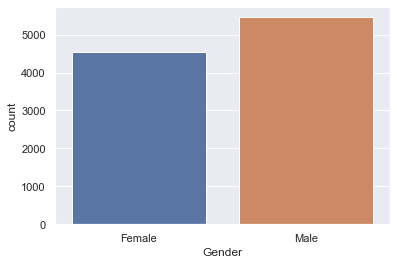

In [5]:
sns.countplot(df_eda['Gender'])
#maior quantidade de homens

<AxesSubplot:xlabel='Age', ylabel='Count'>

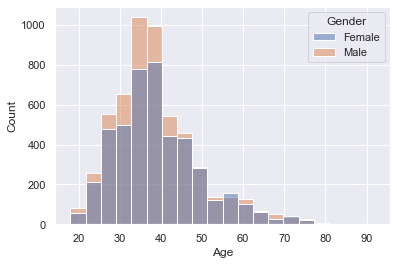

In [6]:
sns.histplot(x=df_eda['Age'],hue=df_eda['Gender'],bins=20)
#idade se concentra entre 30 e 45 anos
#maior quantidade de homens -> entre 30 e 40 anos


In [7]:
df_eda.groupby(['Geography','Gender'])['Exited'].sum()

Geography  Gender
France     Female    460
           Male      350
Germany    Female    448
           Male      366
Spain      Female    231
           Male      182
Name: Exited, dtype: int64

In [8]:
df2_eda = df_eda.pivot_table(columns=['Geography','Gender'], values='Exited', aggfunc='sum')

In [9]:
df2_eda

Geography France      Germany       Spain     
Gender    Female Male  Female Male Female Male
Exited       460  350     448  366    231  182

<AxesSubplot:>

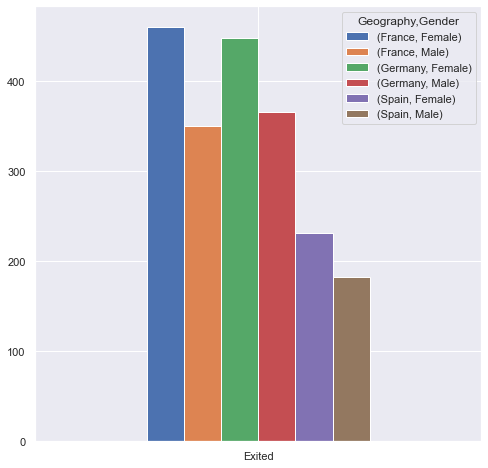

In [10]:
df2_eda.plot(kind="bar", subplots=False, figsize=(8, 8), legend=True, rot=0)

In [11]:
conditions = [
     (df['Age'] < 30),
    ((df['Age'] >= 30) & (df['Age'] < 40)),
    ((df['Age'] >= 40) & (df['Age'] < 50)),
    ((df['Age'] >= 50) & (df['Age'] < 60)),
    (df['Age'] >= 60)
]

In [12]:
grupo_idade = [
    'Menor que 29 anos',
    'Entre 30 e 39 anos',
    'Entre 40 e 49 anos',
    'Entre 50 e 59 anos',
    'Maior que 60 anos'
]

In [13]:
df_eda['grupo_idade'] = np.select(conditions, grupo_idade)

In [14]:
conditions_2 = [
     (df['CreditScore'] < 400),
    ((df['CreditScore'] >= 400) & (df['CreditScore'] < 500)),
    ((df['CreditScore'] >= 500) & (df['CreditScore'] < 600)),
    ((df['CreditScore'] >= 600) & (df['CreditScore'] < 700)),
    ((df['CreditScore'] >= 700) & (df['CreditScore'] < 800)),    
    (df['CreditScore'] >= 800)
]

In [15]:
grupo_cs = [
    'Menor que 400',
    'Entre 400 e 500',
    'Entre 500 e 600',
    'Entre 600 e 700',
    'Entre 700 e 800',
    'Maior que 800'
]

In [16]:
df_eda['grupo_cs'] = np.select(conditions_2, grupo_cs)

In [17]:
df_eda

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,grupo_idade,grupo_cs
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Entre 40 e 49 anos,Entre 600 e 700
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Entre 40 e 49 anos,Entre 600 e 700
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Entre 40 e 49 anos,Entre 500 e 600
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Entre 30 e 39 anos,Entre 600 e 700
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Entre 40 e 49 anos,Maior que 800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Entre 30 e 39 anos,Entre 700 e 800
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Entre 30 e 39 anos,Entre 500 e 600
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Entre 30 e 39 anos,Entre 700 e 800
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Entre 40 e 49 anos,Entre 700 e 800


In [46]:
df_eda.groupby(['grupo_cs','Exited'])['grupo_cs'].count()

grupo_cs         Exited
Entre 400 e 500  0          482
                 1          131
Entre 500 e 600  0         1892
                 1          510
Entre 600 e 700  0         3065
                 1          753
Entre 700 e 800  0         1997
                 1          496
Maior que 800    0          527
                 1          128
Menor que 400    1           19
Name: grupo_cs, dtype: int64

In [19]:
df_eda.groupby(['grupo_idade','Exited'])['grupo_idade'].count()

grupo_idade         Exited
Entre 30 e 39 anos  0         3873
                    1          473
Entre 40 e 49 anos  0         1812
                    1          806
Entre 50 e 59 anos  0          382
                    1          487
Maior que 60 anos   0          379
                    1          147
Menor que 29 anos   0         1517
                    1          124
Name: grupo_idade, dtype: int64

In [20]:
df_eda.groupby(['grupo_idade','Exited'])['Balance'].mean()

grupo_idade         Exited
Entre 30 e 39 anos  0          73084.550108
                    1          91343.691839
Entre 40 e 49 anos  0          73165.452136
                    1          90425.376005
Entre 50 e 59 anos  0          76240.144058
                    1          89431.811068
Maior que 60 anos   0          68664.056016
                    1          91822.518435
Menor que 29 anos   0          71516.891332
                    1         100390.912339
Name: Balance, dtype: float64

<AxesSubplot:xlabel='grupo_idade', ylabel='Balance'>

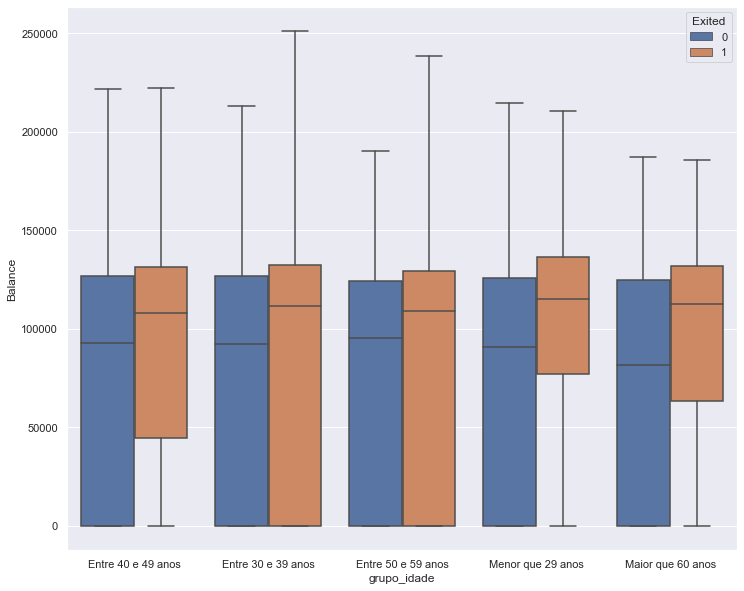

In [78]:
plt.figure(figsize=(12, 10))
sns.boxplot(x=df_eda['grupo_idade'],y=df_eda['Balance'],hue=df_eda['Exited'])


In [21]:
df_eda.groupby(['grupo_idade','Exited'])['EstimatedSalary'].mean()

grupo_idade         Exited
Entre 30 e 39 anos  0          98819.116137
                    1          96955.771078
Entre 40 e 49 anos  0         103089.736060
                    1         104562.266873
Entre 50 e 59 anos  0          92334.534764
                    1         100918.177721
Maior que 60 anos   0          96435.115699
                    1         100467.878231
Menor que 29 anos   0         100771.967047
                    1         101874.094032
Name: EstimatedSalary, dtype: float64

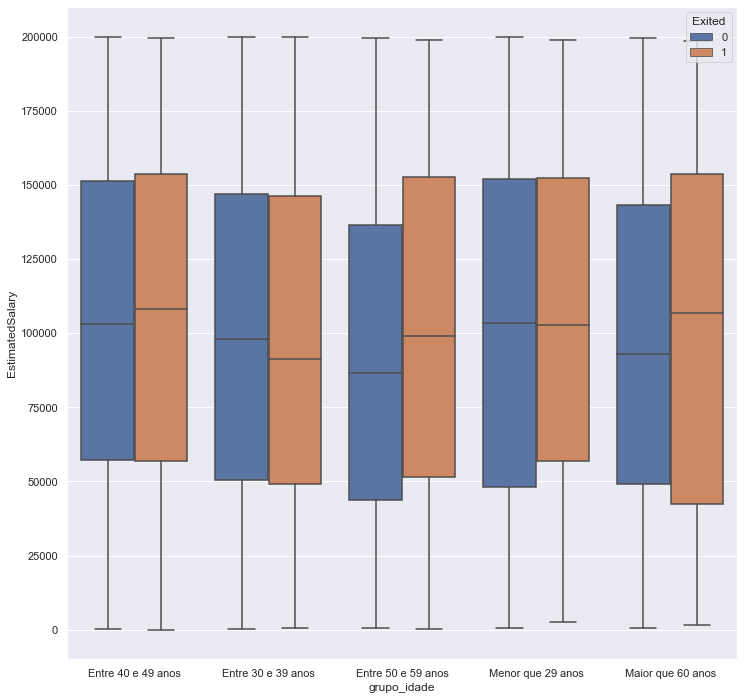

In [86]:
plt.figure(figsize=(12, 12))

sns.boxplot(x=df_eda['grupo_idade'],y=df_eda['EstimatedSalary'],hue=df_eda['Exited'])
plt.legend(loc='upper right', title='Exited')

In [65]:
df_eda.groupby(['grupo_idade','Exited'])['NumOfProducts'].sum()

grupo_idade         Exited
Entre 30 e 39 anos  0         5988
                    1          702
Entre 40 e 49 anos  0         2790
                    1         1186
Entre 50 e 59 anos  0          572
                    1          715
Maior que 60 anos   0          576
                    1          218
Menor que 29 anos   0         2371
                    1          184
Name: NumOfProducts, dtype: int64

In [66]:
df_eda.groupby(['grupo_idade','Exited'])['HasCrCard'].sum()

grupo_idade         Exited
Entre 30 e 39 anos  0         2747
                    1          345
Entre 40 e 49 anos  0         1266
                    1          564
Entre 50 e 59 anos  0          266
                    1          322
Maior que 60 anos   0          269
                    1          104
Menor que 29 anos   0         1083
                    1           89
Name: HasCrCard, dtype: int64

In [67]:
df_eda.groupby(['grupo_idade','Exited'])['IsActiveMember'].sum()

grupo_idade         Exited
Entre 30 e 39 anos  0         2003
                    1          178
Entre 40 e 49 anos  0          946
                    1          276
Entre 50 e 59 anos  0          312
                    1          184
Maior que 60 anos   0          363
                    1           52
Menor que 29 anos   0          792
                    1           45
Name: IsActiveMember, dtype: int64

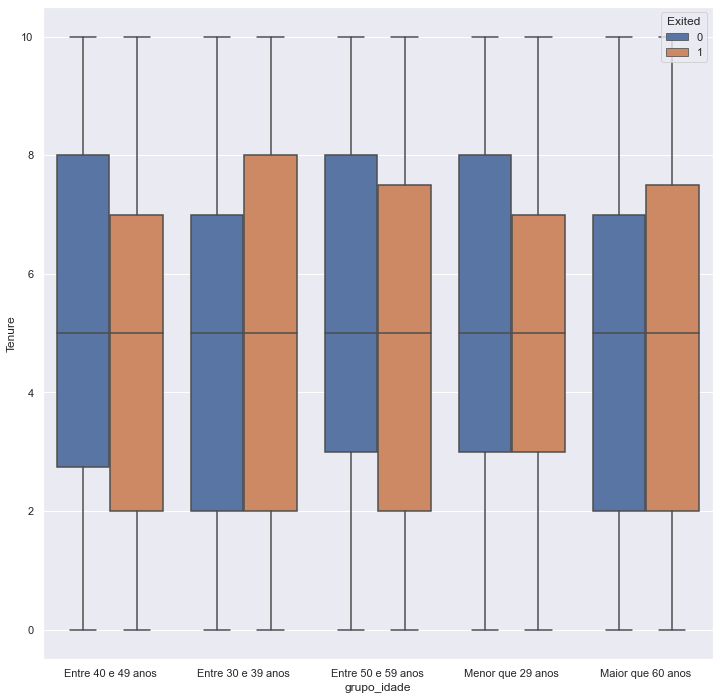

In [93]:
plt.figure(figsize=(12, 12))
sns.boxplot(x=df_eda['grupo_idade'],y=df_eda['Tenure'],hue=df_eda['Exited'])
plt.legend(loc='upper right', title='Exited')